In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(42)

## 生成数据

In [2]:
# 数据格式
rows = 61
cols = 13
columns = [chr(ord('A') + i) for i in range(cols)]
df = pd.DataFrame(index=range(rows), columns=columns)
df = df.apply(lambda x: np.random.randint(1, 101, size=rows))  # 填充随机整数 (1-100)

# 确保每行至少有 5 个 0
for index in df.index:
    non_zero_indices = df.loc[index][df.loc[index] != 0].index.tolist()
    if len(non_zero_indices) > cols - 5:
        num_zeros_needed = max(0, 5 - (cols - len(non_zero_indices)))
        indices_to_zero = np.random.choice(non_zero_indices, size=num_zeros_needed, replace=False)
        df.loc[index, indices_to_zero] = 0
    elif len(non_zero_indices) <= cols - 5:
        num_zeros_needed = 5 - (cols - len(non_zero_indices))
        zero_possible_indices = df.columns[df.loc[index] != 0].tolist()
        if len(zero_possible_indices) > 0:
            indices_to_zero = np.random.choice(zero_possible_indices, size=num_zeros_needed, replace=False)
            df.loc[index, indices_to_zero] = 0
        elif num_zeros_needed > 0: 
            pass

for index in df.index:
    zero_count = (df.loc[index] == 0).sum()
    if zero_count < 5:
        non_zero_cols = df.columns[df.loc[index] != 0].tolist()
        if len(non_zero_cols) >= (5 - zero_count):
            cols_to_zero = np.random.choice(non_zero_cols, size=(5 - zero_count), replace=False)
            df.loc[index, cols_to_zero] = 0
        elif len(non_zero_cols) > 0:
            df.loc[index, non_zero_cols] = 0

In [3]:
df

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,52,0,5,0,38,33,0,14,96,35,17,0,0
1,93,0,41,84,24,24,92,0,0,0,62,37,0
2,15,0,28,0,69,75,30,0,0,33,84,38,0
3,72,8,0,62,0,0,0,15,1,0,89,83,14
4,61,47,73,75,70,36,0,0,0,0,86,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,90,81,62,68,80,4,0,0,0,13,0,0,33
57,53,0,57,55,3,0,20,1,0,23,0,0,65
58,2,35,0,75,20,64,65,58,0,0,0,0,18
59,84,35,0,0,24,0,8,0,12,0,66,20,96


## 计算行上的百分比

In [4]:
row_sums = df.sum(axis=1)
df0 = df.div(row_sums, axis=0)

In [5]:
df0

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,0.179310,0.000000,0.017241,0.000000,0.131034,0.113793,0.000000,0.048276,0.331034,0.120690,0.058621,0.000000,0.000000
1,0.203501,0.000000,0.089716,0.183807,0.052516,0.052516,0.201313,0.000000,0.000000,0.000000,0.135667,0.080963,0.000000
2,0.040323,0.000000,0.075269,0.000000,0.185484,0.201613,0.080645,0.000000,0.000000,0.088710,0.225806,0.102151,0.000000
3,0.209302,0.023256,0.000000,0.180233,0.000000,0.000000,0.000000,0.043605,0.002907,0.000000,0.258721,0.241279,0.040698
4,0.131749,0.101512,0.157667,0.161987,0.151188,0.077754,0.000000,0.000000,0.000000,0.000000,0.185745,0.000000,0.032397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.208817,0.187935,0.143852,0.157773,0.185615,0.009281,0.000000,0.000000,0.000000,0.030162,0.000000,0.000000,0.076566
57,0.191336,0.000000,0.205776,0.198556,0.010830,0.000000,0.072202,0.003610,0.000000,0.083032,0.000000,0.000000,0.234657
58,0.005935,0.103858,0.000000,0.222552,0.059347,0.189911,0.192878,0.172107,0.000000,0.000000,0.000000,0.000000,0.053412
59,0.243478,0.101449,0.000000,0.000000,0.069565,0.000000,0.023188,0.000000,0.034783,0.000000,0.191304,0.057971,0.278261


## 可视化

In [6]:
# 根据自己的字段名称修改
colors = {
    'A': '#0161a2',
    'B': '#a8c0e1',
    'C': '#f4752c',
    'D': '#93bf83',
    'E': '#fff0bc',
    'F': '#ffb979',
    'G': '#0093ba',
    'H': '#00846a',
    'I': '#b4af5f',
    'J': '#459641',
    'K': '#cc8464',
    'L': '#feb4ab',
    'M': '#c4131d'
}

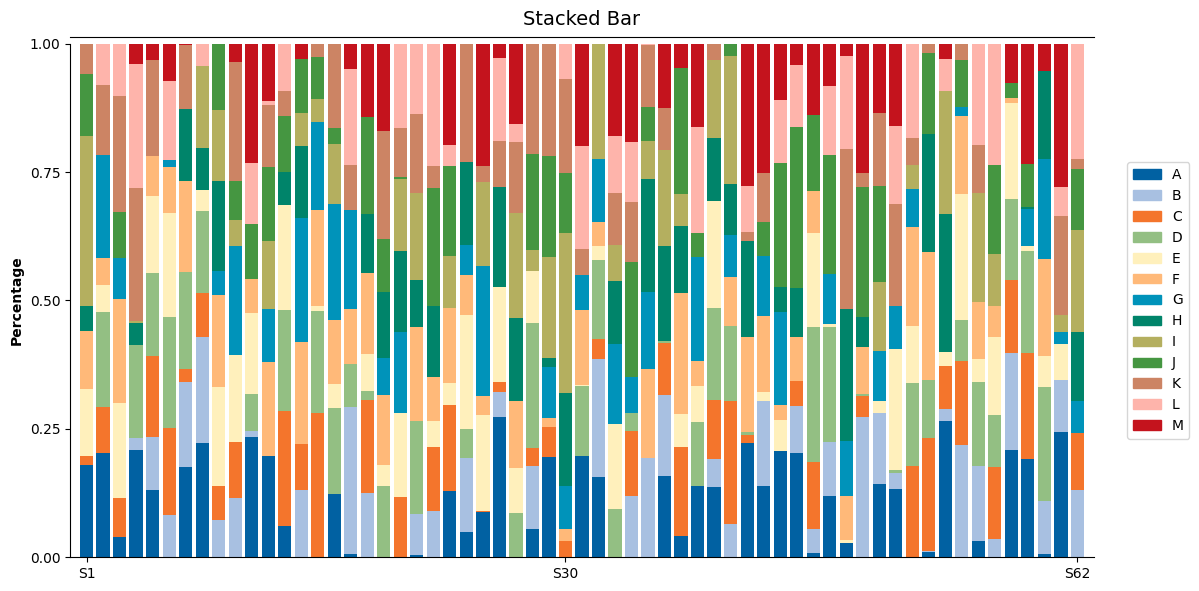

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

bottom = [0] * len(df0)
for column in df0.columns:
    ax.bar(df0.index.astype(str), df0[column], bottom=bottom, color=colors[column], label=column)
    bottom = [bottom[i] + df0[column][i] for i in range(len(df0))]

ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])  # y

desired_x_labels = ['S1', 'S30', 'S62']  # x
xticks_positions = [0, 29, 60] 
xticks_labels = desired_x_labels
ax.set_xticks(xticks_positions)
ax.set_xticklabels(xticks_labels)

# ax.set_xlabel('Label', fontweight='bold')
ax.set_ylabel('Percentage', fontweight='bold')
ax.set_title('Stacked Bar', fontsize=14, y=1.02)

ax.spines['right'].set_visible(False)  # 去掉右边框
ax.spines['top'].set_position(('outward', 5)) # 将上边框向外移动

ax.set_xlim(left=-1, right=61)  # 调整 x 轴左边界
ax.set_ylim(bottom=0)  # 确保 y 轴从 0 开始

# 添加自定义图例
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[column]) for column in df0.columns]
labels = df0.columns
ax.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()